In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

Attributes:
It consists of 15 attributes which are describes as follows :

- Subject.ID - Unique Id of the patient
- MRI.ID - Unique Id generated after conducting MRI on patient
- Group - It is a group of Converted (Previously Normal but developed dimentia later), Demented and Nondemented (Normal Pateints)
- Visit - Number of visit to detect dementia status
- MR.Delay - Not Known
##### Demographics Info

- M.F - Gender
- Hand - Handedness (actually all subjects were right-handed so I will drop this column)
- Age - Age in years
- EDUC - Years of education
- SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)
#### Clinical Info
- MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
- CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
- Derived anatomic volumes
- eTIV - Estimated total intracranial volume, mm3
- nWBV - Normalized whole-brain volume
- ASF - Atlas scaling factor (unitless).

In [2]:
# Reading dataset

df = pd.read_csv('Dataset/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
df.shape

(373, 15)

In [9]:
# dropping unneccassry columns

df.drop(['Subject ID','MRI ID','Hand'],axis=1,inplace=True)

In [11]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    object 
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       354 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    int64  
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


In [10]:
df.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

#### Only two columns has null values we cann fill them with medain or mean from our observation

In [33]:
def plot_univarite_analysis(df,feature):
    sns.set(rc={'figure.figsize':(16,8)})
    fig,ax=plt.subplots(1,2)
    ax[0].set_title(f'{feature} histogram')
    df[feature].plot(kind='hist',ax=ax[0],grid=True)
    ax[1].set_title(f'{feature} distribution')
    sns.distplot(x=df[feature],hist=False)
    plt.show()

In [38]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if feature not in numerical_features]

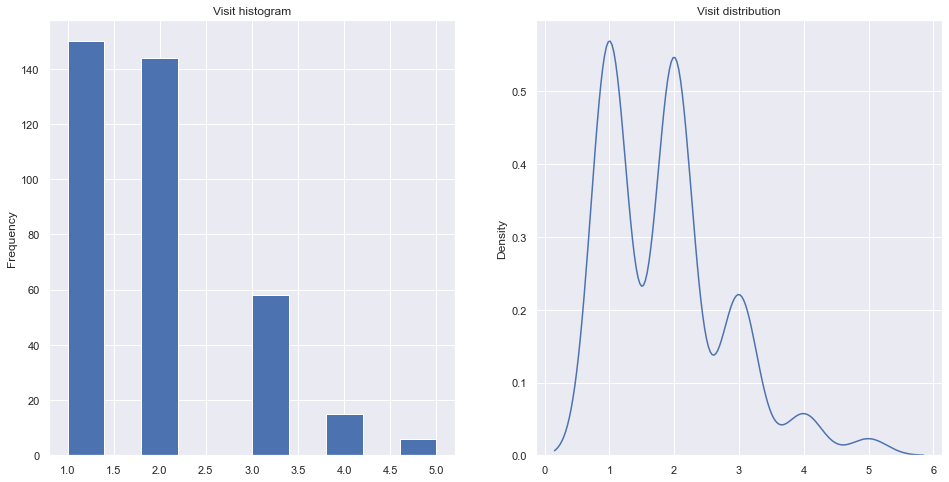

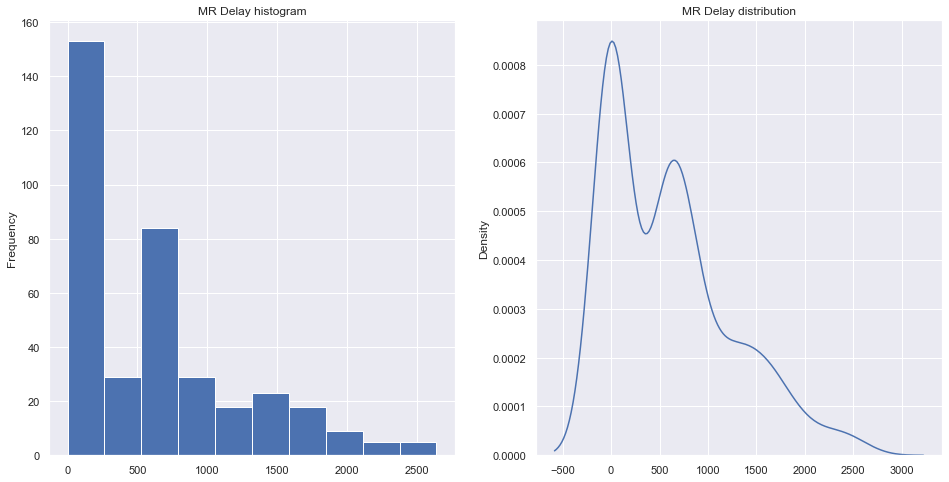

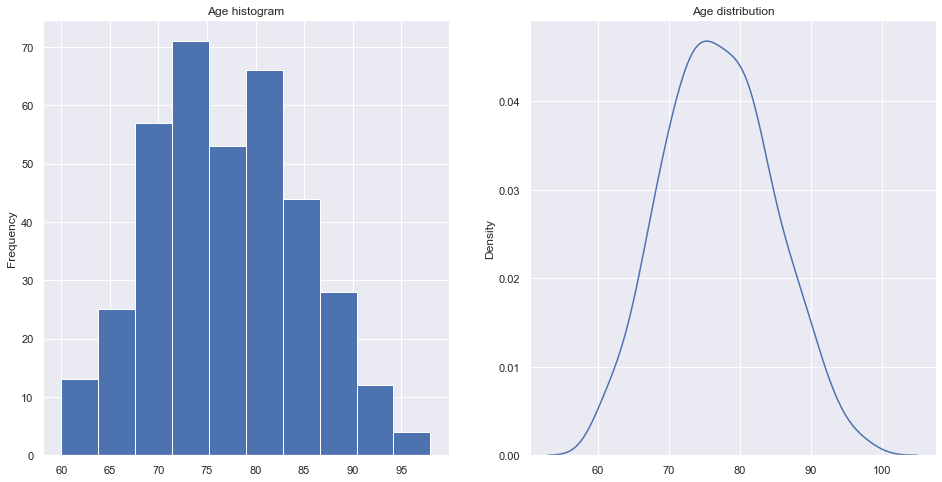

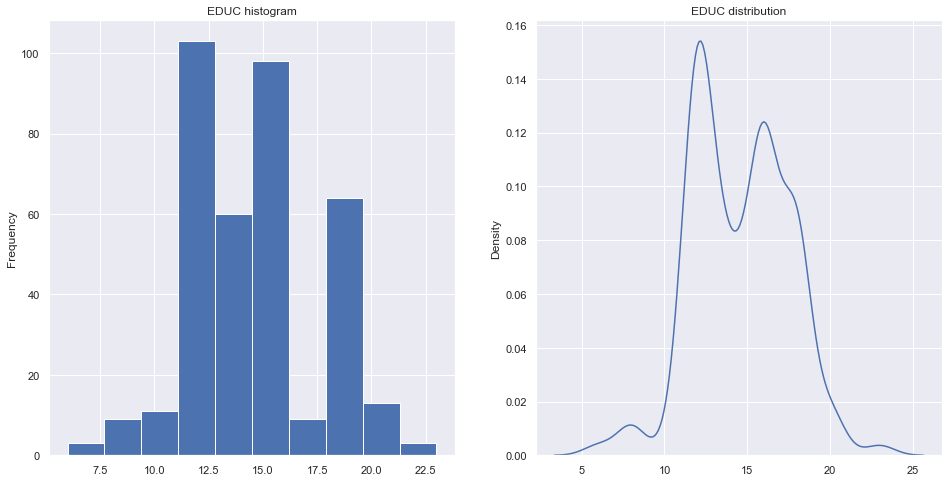

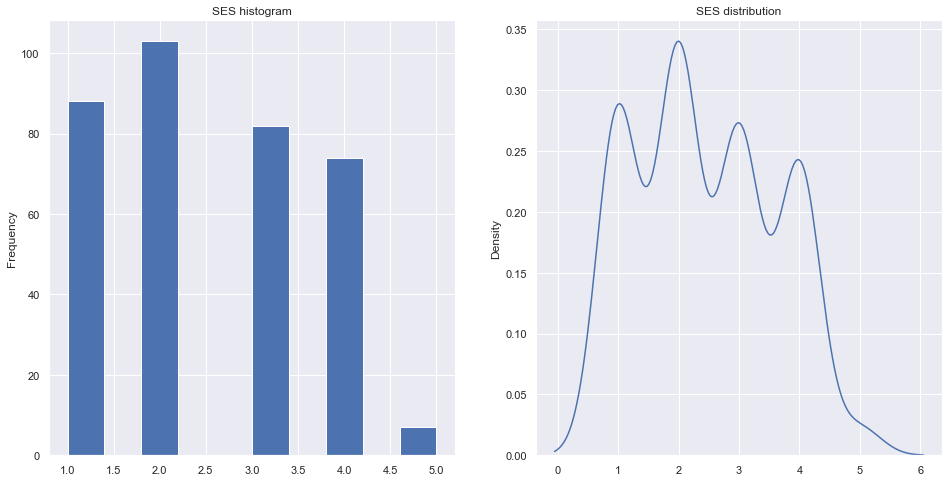

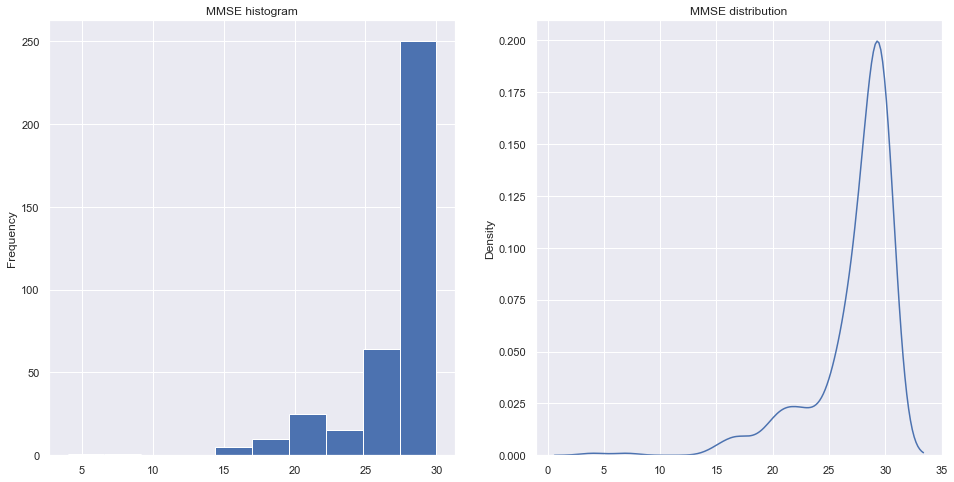

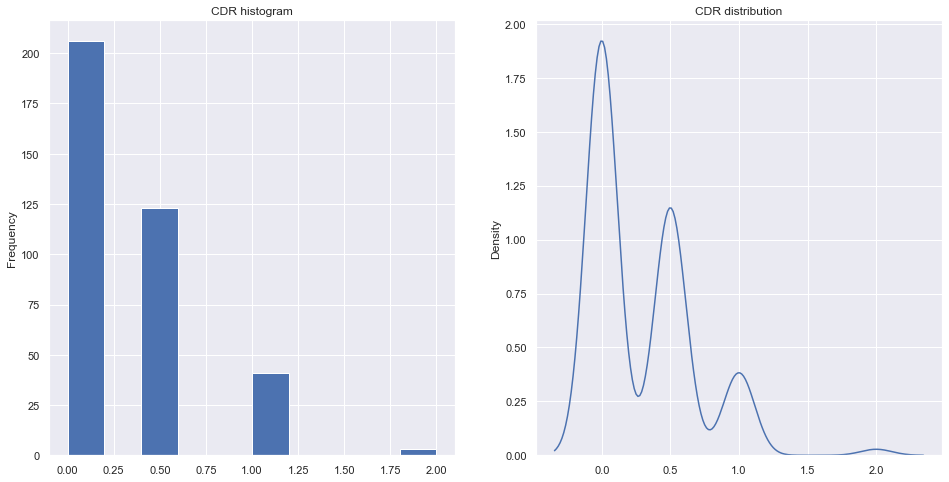

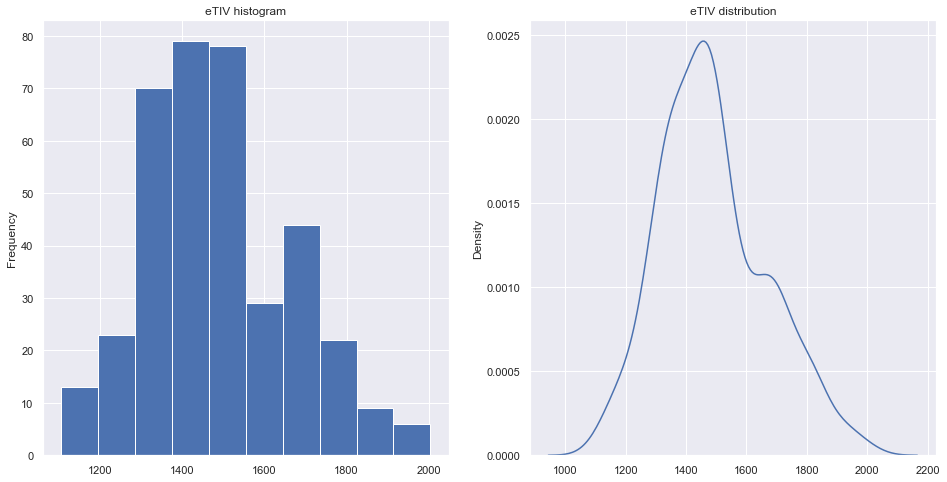

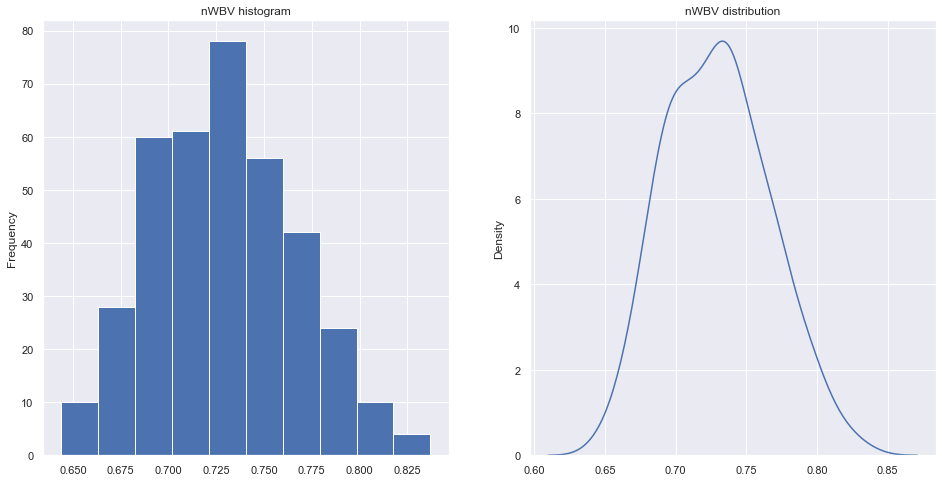

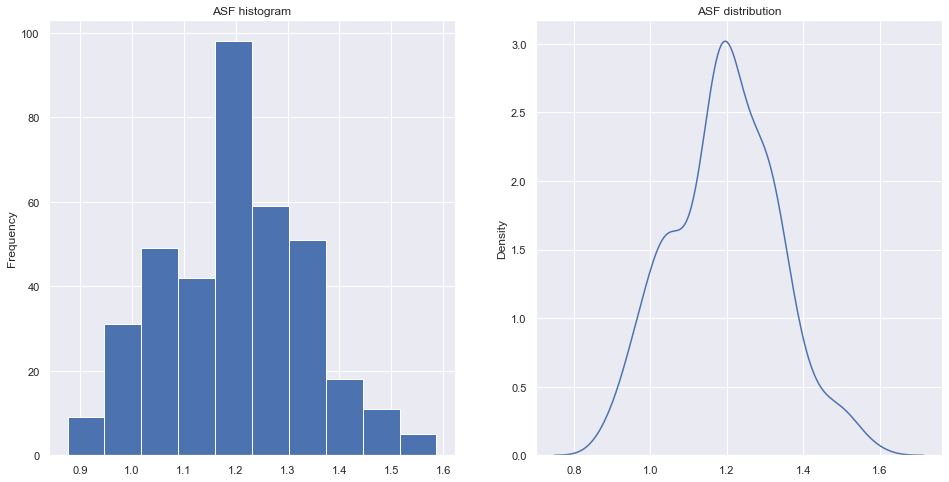

In [39]:
for feature in numerical_features:
    plot_univarite_analysis(df,feature)

In [45]:
def plot_categorical_analysis(df,feature):
    sns.set(rc={'figure.figsize':(16,8)})
    fig,ax=plt.subplots(1,2)
    ax[0].set_title(f'{feature} coutplot')
    sns.countplot(df[feature],ax=ax[0])
    
    ax[1].set_title(f'{feature} countplot with target feature')
    sns.countplot(df[feature],ax=ax[1],hue=df['Group'],)
    plt.show() 
    
    

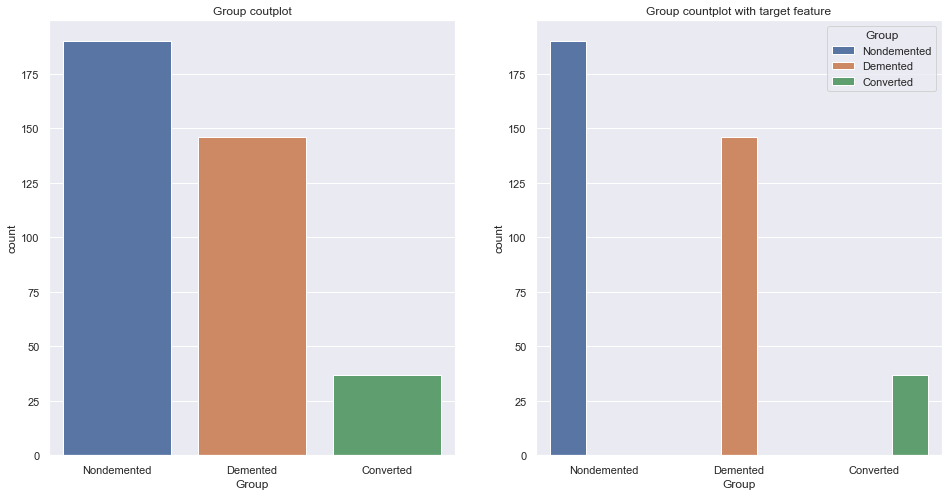

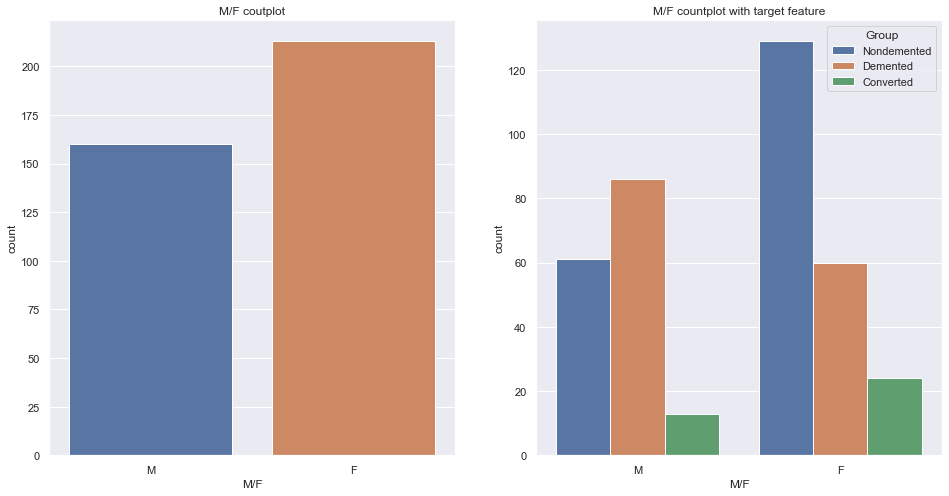

In [46]:
for feature in categorical_features:
    plot_categorical_analysis(df,feature)

<AxesSubplot:xlabel='Group', ylabel='count'>

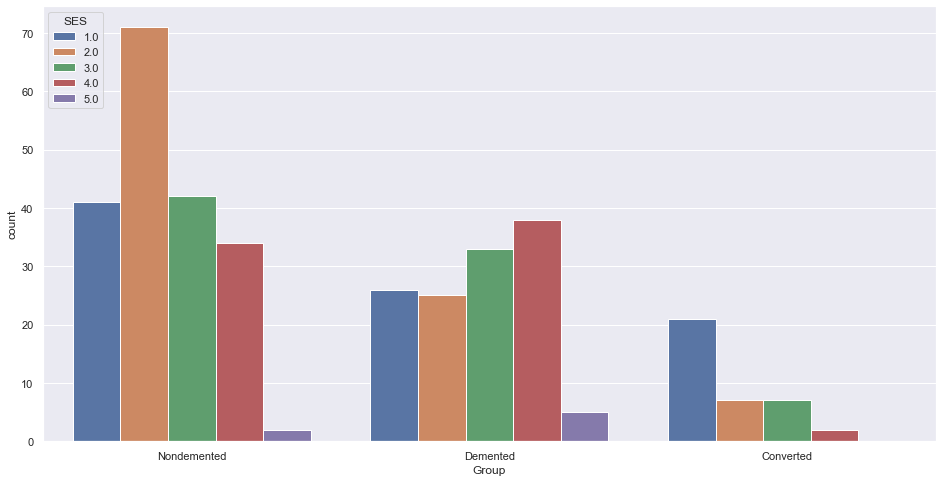

In [67]:
## checkinng the target feature with ses and Male and Female

sns.countplot(df['Group'],hue=df['SES'].fillna(df['SES'].mode()))

<AxesSubplot:xlabel='Group'>

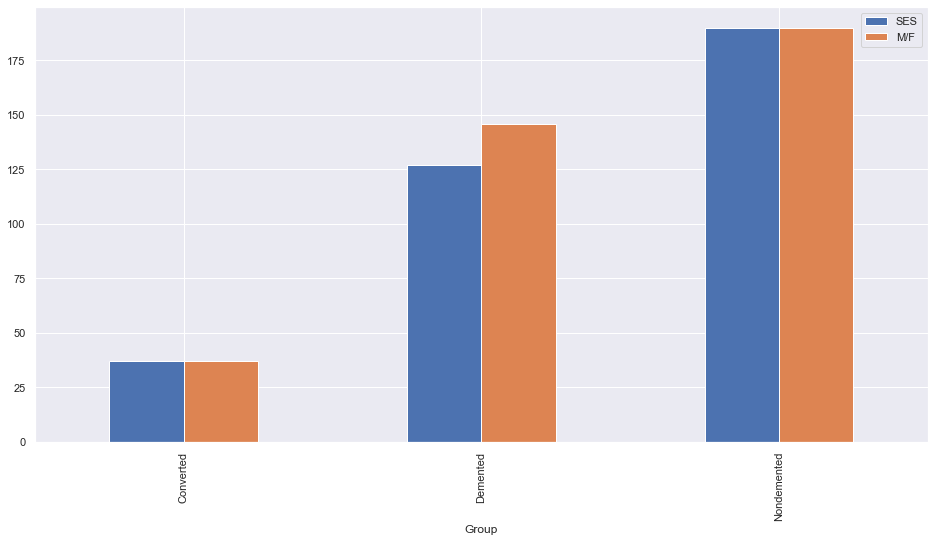

In [76]:
df.groupby('Group')['SES','M/F'].count()

In [93]:
freq_table = pd.crosstab(index=[df.Group, df.SES], columns=df['M/F'])
freq_table

M/F               F   M
Group       SES        
Converted   1.0  11  10
            2.0   4   3
            3.0   7   0
            4.0   2   0
Demented    1.0   4  22
            2.0  12  13
            3.0  17  16
            4.0  13  25
            5.0   5   0
Nondemented 1.0  24  17
            2.0  54  17
            3.0  31  11
            4.0  18  16
            5.0   2   0

<AxesSubplot:xlabel='Group,SES'>

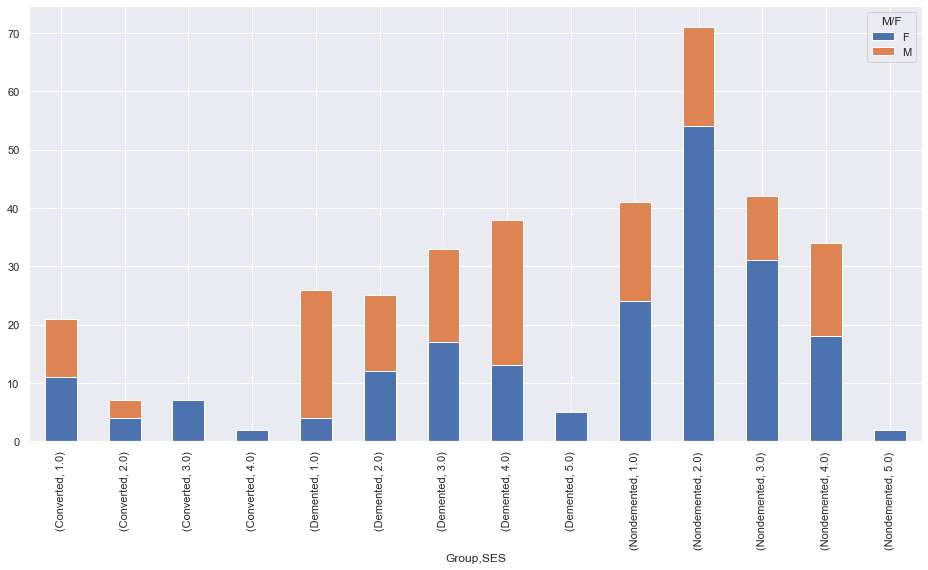

In [94]:
freq_table.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='EDUC', ylabel='count'>

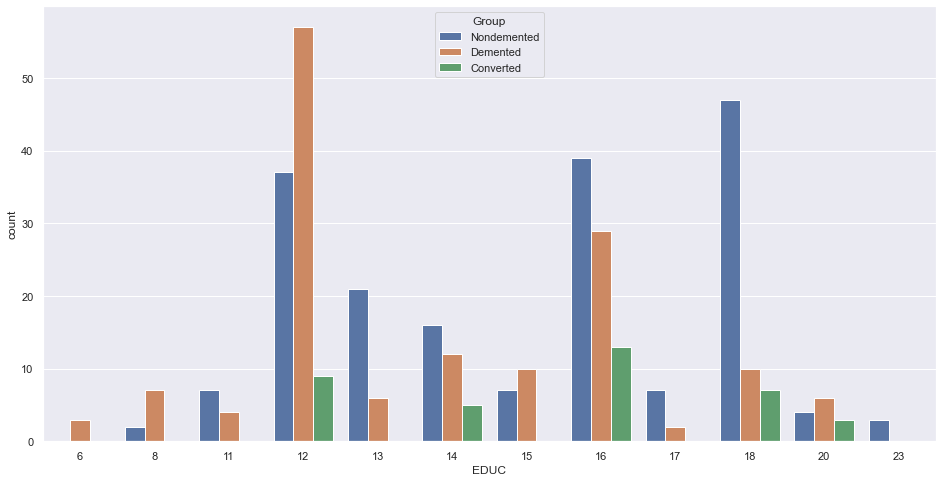

In [89]:
sns.countplot(df['EDUC'],hue=df['Group'])

<AxesSubplot:>

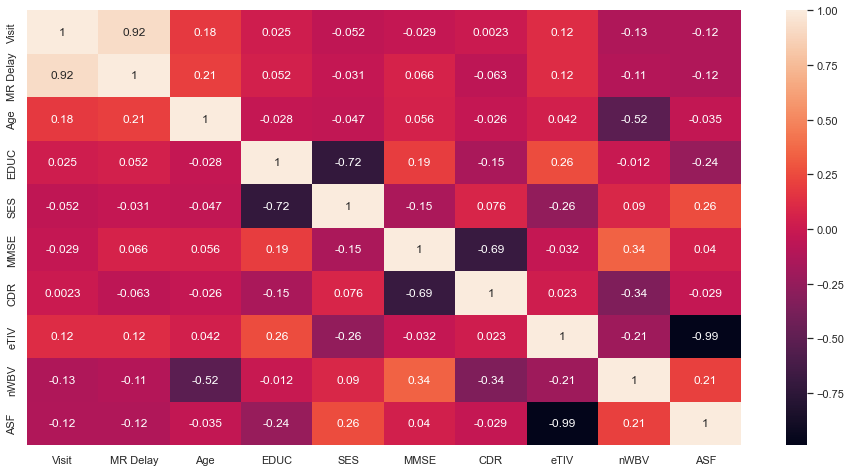

In [85]:
sns.heatmap(df.corr(),annot=True)

In [112]:
# Mode encoding for SES

df['SES'].fillna(df['SES'].mode().values[0],inplace=True)

In [101]:
df['MMSE'].fillna(df['MMSE'].median(),inplace=True)

In [113]:
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [116]:
male_female_grp = {'M':1,'F':0}
df['M/F']=df['M/F'].map(male_female_grp)

In [117]:
X=df.drop('Group',axis=1)
y=df.Group

In [118]:
## Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)


In [127]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
# saving training data
pd.concat([X_train.reset_index(drop=True),pd.DataFrame(le.inverse_transform(y_train),columns=['Group'])],axis=1).to_csv('Dataset/train.csv',index=False)

In [143]:
# saving test data
pd.concat([X_test.reset_index(drop=True),pd.DataFrame(le.inverse_transform(y_test),columns=['Group'])],axis=1).to_csv('Dataset/test.csv',index=False)

In [217]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

In [191]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average='micro') # Calculate F1-score
    precision = precision_score(true, predicted,average='micro') # Calculate Precision
    recall = recall_score(true, predicted,average='micro') # Calculate Recall
    #roc_auc = roc_auc_score(true, predicted,average='macro') #Calculate Roc
    return acc, f1 , precision, recall


In [169]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    models_list = {}
    models_list1=[]
    accuracy_list = []
    classificationreport={}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list1.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))

        print('='*35)
        print('\n')
        models_list[list(models.keys())[i]]=model

    return models_list

In [218]:
model_res=evaluate_models(X,y,models)

DecisionTreeClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8533
- F1 score: 0.8533
- Precision: 0.8533
- Recall: 0.8533


RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8800
- F1 score: 0.8800
- Precision: 0.8800
- Recall: 0.8800


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8933
- F1 score: 0.8933
- Precision: 0.8933
- Recall: 0.8933




In [247]:
bars = []
for key,model in model_res.items():
    pred=model.predict(X_test)
    bars.append(accuracy_score(y_test,pred)*100)

In [239]:
model_res

{'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'GradientBoostingClassifier': GradientBoostingClassifier()}

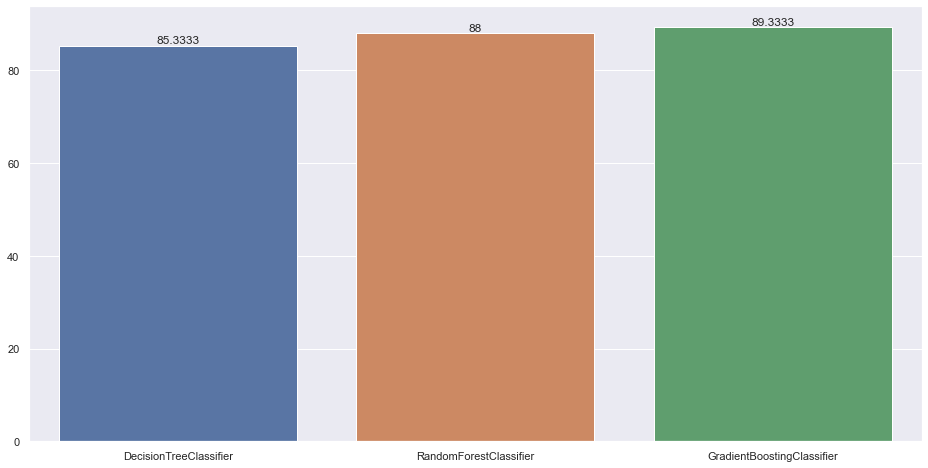

In [248]:
ax=sns.barplot(x=list(model_res.keys()),y=bars)
for i in ax.containers:
    ax.bar_label(i)